In [2]:
# Load lib raries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
costcos = pd.read_csv("costcos-geocoded.csv")
ballers = pd.read_csv("ppg2008.csv", index_col=0)

# Set color to Bellevue purple
color = "#4f3674"

## Heat Map

In [5]:
ballers.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


<AxesSubplot:ylabel='Name  '>

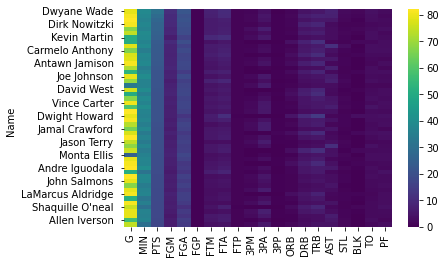

In [27]:
sns.heatmap(ballers, cmap='viridis')

In [28]:
# Normalize columns
baller_norm = (ballers - ballers.mean())/ballers.std()

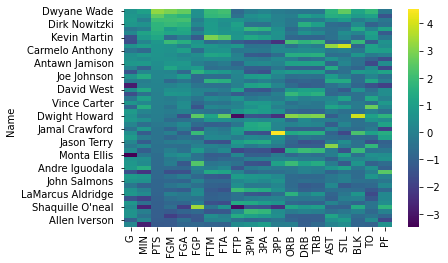

In [31]:
# Heatmap normalized data
sns.heatmap(baller_norm, cmap='viridis')
plt.show()

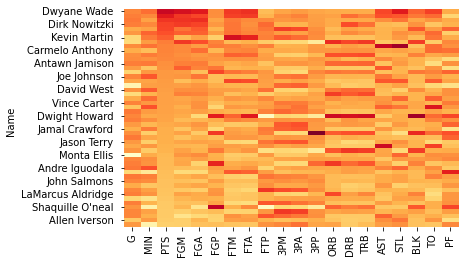

In [36]:
# Heatmap normalized data
sns.heatmap(baller_norm, cmap='YlOrRd', cbar=False)
plt.show()

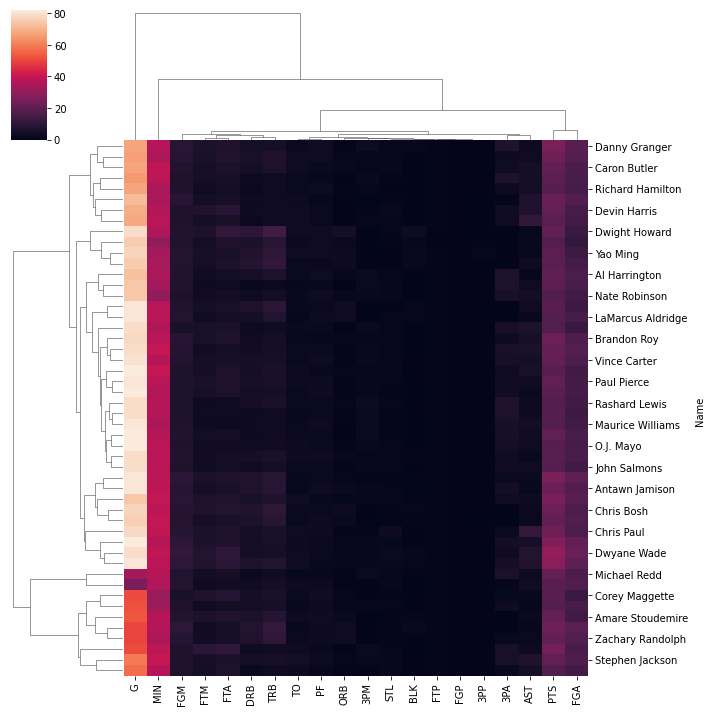

In [38]:
sns.clustermap(ballers)

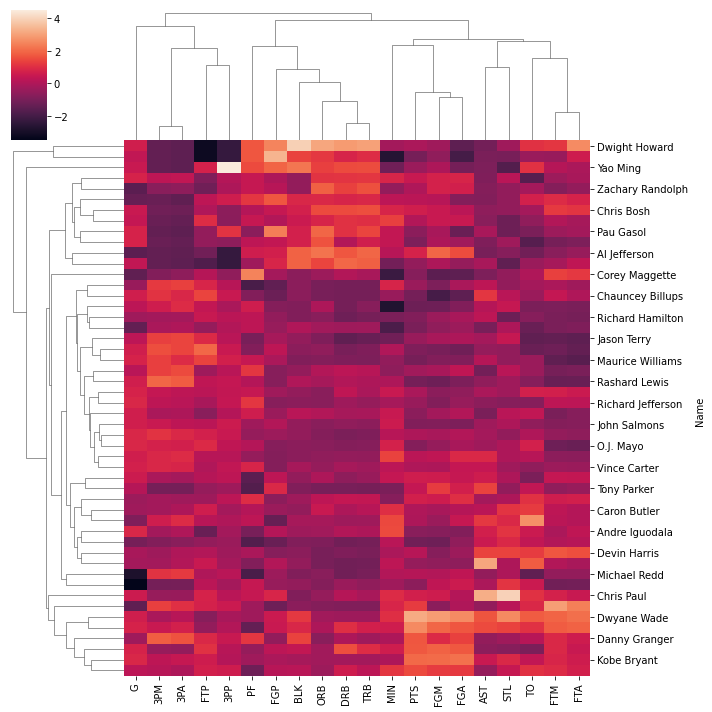

In [39]:
sns.clustermap(baller_norm)

## Spatial Chart

In [41]:
import folium

In [43]:
costcos.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [64]:
# Make an empty map
m = folium.Map(location=[39.83,-98.58], tiles="OpenStreetMap", zoom_start=5)
# Show map
m

In [65]:
# Add markers to map
for i in range(0, len(costcos)):
    folium.Marker(
        location=[costcos.iloc[i]['Latitude'], costcos.iloc[i]['Longitude']],
        popup=costcos.iloc[i]['City'],
    ).add_to(m)

In [66]:
m

## Contour Chart

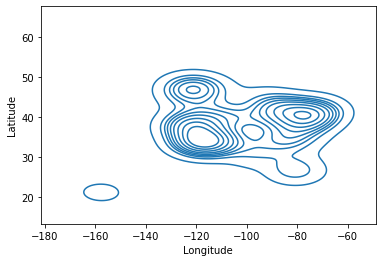

In [69]:
sns.kdeplot(x=costcos.Longitude, y=costcos.Latitude)
plt.show()

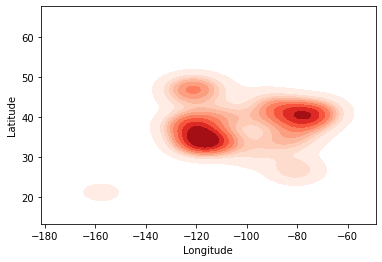

In [78]:
sns.kdeplot(x=costcos.Longitude, y=costcos.Latitude, 
            cmap="Reds", shade=True, bw_adjust=1)
plt.show()

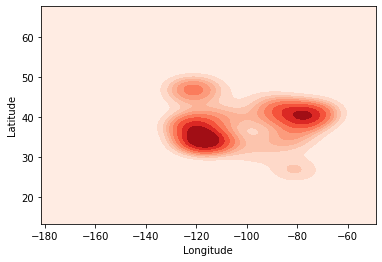

In [84]:
sns.kdeplot(x=costcos.Longitude, y=costcos.Latitude, 
            cmap="Reds", shade=True, thresh=0)
plt.show()

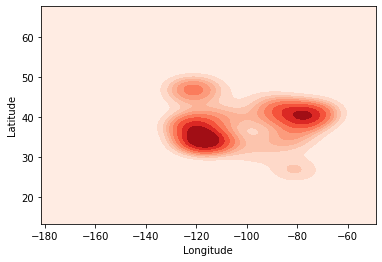

In [87]:
sns.kdeplot(x=costcos.Longitude, y=costcos.Latitude, 
            cmap="Reds", shade=True, thresh=0, bw_adjust=1)
plt.show()

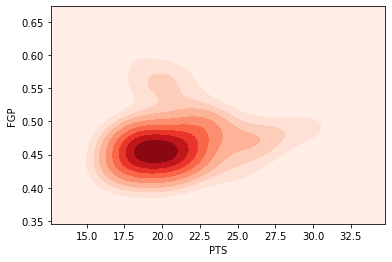

In [89]:
sns.kdeplot(x=ballers.PTS, y=ballers.FGP, 
            cmap="Reds", shade=True, thresh=0, bw_adjust=1)
plt.show()

In [88]:
ballers.head()

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
